Question -5 . Collaborative Filtering (Stochastic Gradient Descent for Matrix Factorization)

*Group Members*
1. 1741031: Foram Vadher
2. 1741034: Krinali Shah
3. 1741074: Arpit Patel
4. 1741079: Vaishwi Patel

Importing Libraries

In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['ggplot'])

Intializing variables and U, V and R

In [9]:
# R is a rating matrix R_n*m where n total number of user , m is total number of items
# U is user matrix U_k*n k is feature of item
# V is item matrix V_k*m k is feature of item

n = 12 # number of user
m = 60 # number of item
k = 10 #number of item feature

#Initialize R,U,V randomly
R = np.random.randint(5, size=(n, m))
U = np.random.randint(5, size=(k, n))
V = np.random.randint(5, size=(k, m))

eta=0.1  #learning rate 
lamda =0.5 #regularization parameter

print('Size of R : ',R.shape)
print('Size of U : ',U.shape)
print('Size of V : ',V.shape)
print(R)
print(U)
print(V)

Size of R :  (12, 60)
Size of U :  (10, 12)
Size of V :  (10, 60)
[[4 1 1 2 1 0 3 0 4 0 1 3 4 3 4 1 3 0 0 1 1 1 2 3 3 0 3 2 1 0 0 4 0 2 2 4
  2 1 4 2 0 3 3 1 0 4 0 4 0 0 1 3 3 3 2 2 0 2 2 4]
 [1 2 4 1 0 4 2 1 0 1 2 3 3 4 3 0 1 2 0 4 3 4 2 1 4 3 0 1 0 2 4 2 0 0 4 2
  2 1 3 2 2 2 1 1 4 3 4 3 3 3 1 0 1 1 2 2 4 3 2 4]
 [0 2 1 4 3 0 0 2 4 4 0 4 1 2 2 4 4 2 3 2 2 2 4 3 4 2 3 0 2 1 4 0 3 0 3 4
  0 1 0 0 0 2 1 3 1 0 2 2 2 0 1 0 1 2 4 0 1 3 3 1]
 [4 0 0 2 4 0 4 2 0 4 4 4 4 1 1 4 2 1 2 3 1 0 2 1 4 2 2 0 3 4 3 2 1 2 3 4
  4 0 0 2 1 3 1 1 1 4 4 2 1 4 3 0 2 2 3 2 0 3 3 0]
 [4 3 4 0 0 2 1 4 1 3 0 3 1 0 0 0 2 2 2 3 0 1 1 1 4 3 1 1 3 3 2 2 3 3 2 1
  3 0 1 2 3 0 3 2 4 2 2 2 3 1 4 1 0 2 1 4 1 2 4 0]
 [1 3 3 4 3 3 3 4 2 1 1 2 2 2 1 2 3 3 3 3 3 3 2 0 4 2 1 0 3 3 1 4 3 4 1 3
  3 2 3 2 3 2 3 0 1 3 2 2 1 1 3 0 1 3 1 4 0 0 3 3]
 [3 2 0 1 3 3 1 4 1 0 1 0 2 0 3 4 3 3 1 4 0 3 0 1 4 3 0 1 4 0 0 0 1 1 1 1
  3 0 1 4 1 4 4 2 3 1 0 1 2 4 4 1 1 0 3 4 3 4 0 2]
 [4 2 4 2 3 2 2 2 0 0 1 4 1 3 0 1 1 2 2 2 4 0 1 3 1 3 2 1 2

![alt text](https://drive.google.com/uc?id=1ZXSzUlKKerNmm3x17cED2hB-5f_3hUO9)


Difference between np.dot and np.mulyiply 
So here np.dot is use for matrix multiplication
And np.multiply for element wise multiplication of an array or matrix

In [10]:
num_iteration = 100
mse = np.zeros(num_iteration)
for iteration in range(num_iteration):
    for i in range(R.shape[0]):
        for j in range(R.shape[1]):

            if R[i,j] == 0:
                print("IF")
                U[:,i] = U[:,i]
                V[:,i] = V[:,i]
            else:
                # print('Else', np.sum(2*eta*((U[:,i].T*V[:,j]-R[i,j])*V[:,j]+(lamda/m)*U[:,i])))
                print('Else', np.sum(np.multiply(U[:,i].T,V[:,j])))
                U[:,i] = U[:,i] - 2*eta*((np.sum(np.multiply(U[:,i].T,V[:,j]))-R[i,j])*V[:,j]+(lamda/m)*U[:,i])
                V[:,j] = V[:,j] - 2*eta*((np.sum(np.multiply(U[:,i].T,V[:,j]))-R[i,j])*U[:,i]+(lamda/n)*V[:,j])

    R_new = np.dot(U.T,V)
    difference_array = np.subtract(R, R_new)
    # print('diff:', np.sum(difference_array))
    squared_array = np.square(difference_array)
    mse[iteration] = squared_array.mean()

    # print('iter:', iteration, ', mse:', mse[iteration])

#print("Final MSE : ",mse)


Streaming output truncated to the last 5000 lines.
Else -8014740030434836480
Else 385991596929843200
Else -565164968536440832
IF
Else 2114654428852912128
IF
Else 4355366942342381568
IF
IF
Else 8838818635464441856
Else 4816696444782477312
Else 6635913735425622016
Else 5930071877421105152
Else 8684095586269626368
Else 476802933164605440
IF
Else -8451893165232488448
Else 7972078188395724800
Else 5282673445300600832
Else 6201090428923674624
Else -4730513050805403648
Else -5852280409634897920
Else -7333738716572680192
IF
Else -5974543373643022336
Else -3968785734451724288
Else 1937656218980974592
IF
Else 1880040898133753856
Else -1806962809761300480
Else 3717539985838096384
Else -7374353233257693184
Else -6421830590152835072
Else 8532875167614992384
IF
Else -3761185483535941632
Else 9082681577739649024
IF
Else 2705173070039351296
Else -2752978876351381504
Else -6625042528699940864
Else 4670081126516916224
Else 4499198031020818432
Else 3364579545666027520
Else 5618555933911285760
IF
Else 346

Text(0, 0.5, 'MSE')

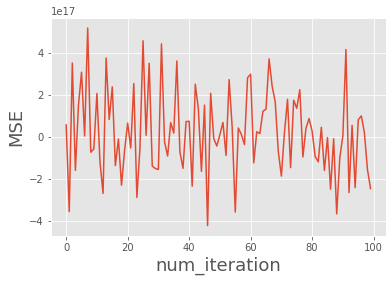

In [11]:
plt.plot(range(num_iteration),mse)
plt.xlabel("num_iteration", fontsize=18)
#plt.ylabel("MSE", rotation=0, fontsize=18)
plt.ylabel("MSE", fontsize=18)
#_ =plt.axis([0,2,0,15])



In [12]:
a = np.array([1 ,4 ,5, 6])
b= np.array([2, 3, 5 ,6])
dot = np.multiply(a,b)
print(dot)
print(np.sum(dot))

[ 2 12 25 36]
75
